In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import requests


In [2]:
df = pd.read_feather('traceroute_1.feather')

In [3]:
print(df)

         index                   created  probe_id   source_address  \
0            0 2021-11-25 16:14:49+00:00      6025  213.225.160.239   
1            1 2021-11-25 16:14:59+00:00      6030  193.105.163.172   
2            2 2021-11-25 16:14:59+00:00      6031     145.220.0.55   
3            3 2021-11-25 16:14:53+00:00      6041    213.190.96.41   
4            4 2021-11-25 16:14:58+00:00      6043    192.65.184.54   
...        ...                       ...       ...              ...   
345843  345843 2021-11-30 15:00:02+00:00      7030    45.11.104.146   
345844  345844 2021-11-30 15:00:01+00:00      7033     85.93.215.82   
345845  345845 2021-11-30 15:00:04+00:00      7039  103.170.232.152   
345846  345846 2021-11-30 15:00:00+00:00      7045     5.188.202.25   
345847  345847 2021-11-30 15:14:55+00:00      6276  194.149.138.252   

                        end_time  paris_id  total_hops  last_median_rtt  \
0      2021-11-25 16:14:55+00:00        15           9          155.201 

In [4]:
def calc_score(median, hops):
    if hops is None:
        return 0
    return abs(hops-median)

In [5]:
def normalize(min_score, max_score, score):
    if max_score-min_score == 0:
        return 0
    return (score-min_score)/(max_score-min_score)

In [15]:
def get_country_code(probe_id):
    response = requests.get(f"https://atlas.ripe.net/api/v2/probes/{probe_id}").json()
    return response['country_code']
    

In [16]:
"""
x- as de tijd
y- as de unieke probes
de kleur van licht naar donker. Licht is als er niets aan de hand is en donker als het een aantal standaard afwijkingen afwijkt
 """

unique_probes = df['probe_id'].unique()

for i, probe_id in enumerate(unique_probes):
    hops_series_probe = df[df['probe_id'] == probe_id]['total_hops']
    median = hops_series_probe.median()
    scores = hops_series_probe.apply(lambda total_hops: calc_score(median, total_hops))
    score_max = scores.max()
    score_min = scores.min()
    normalized_scores = scores.apply(lambda score: normalize(score_min, score_max, score))
    df.loc[df['probe_id'] == probe_id, 'not_normalized_score'] = scores
    df.loc[df['probe_id'] == probe_id, 'normalized_score'] = normalized_scores
    df.loc[df['probe_id'] == probe_id, 'country_code'] = get_country_code(probe_id)
    


In [17]:
print(df)

         index                   created  probe_id   source_address  \
0            0 2021-11-25 16:14:49+00:00      6025  213.225.160.239   
1            1 2021-11-25 16:14:59+00:00      6030  193.105.163.172   
2            2 2021-11-25 16:14:59+00:00      6031     145.220.0.55   
3            3 2021-11-25 16:14:53+00:00      6041    213.190.96.41   
4            4 2021-11-25 16:14:58+00:00      6043    192.65.184.54   
...        ...                       ...       ...              ...   
345843  345843 2021-11-30 15:00:02+00:00      7030    45.11.104.146   
345844  345844 2021-11-30 15:00:01+00:00      7033     85.93.215.82   
345845  345845 2021-11-30 15:00:04+00:00      7039  103.170.232.152   
345846  345846 2021-11-30 15:00:00+00:00      7045     5.188.202.25   
345847  345847 2021-11-30 15:14:55+00:00      6276  194.149.138.252   

                        end_time  paris_id  total_hops  last_median_rtt  \
0      2021-11-25 16:14:55+00:00        15           9          155.201 

In [7]:
# select probes
print(unique_probes[0:10])
selected_df = df[df['probe_id'].isin(unique_probes[0:10])]


[6025 6030 6031 6041 6043 6053 6054 6063 6071 6072]


In [26]:
# group scores by country_code use the average of scores
sorted_df = df.sort_values('country_code')

<AxesSubplot:xlabel='created', ylabel='country_code'>

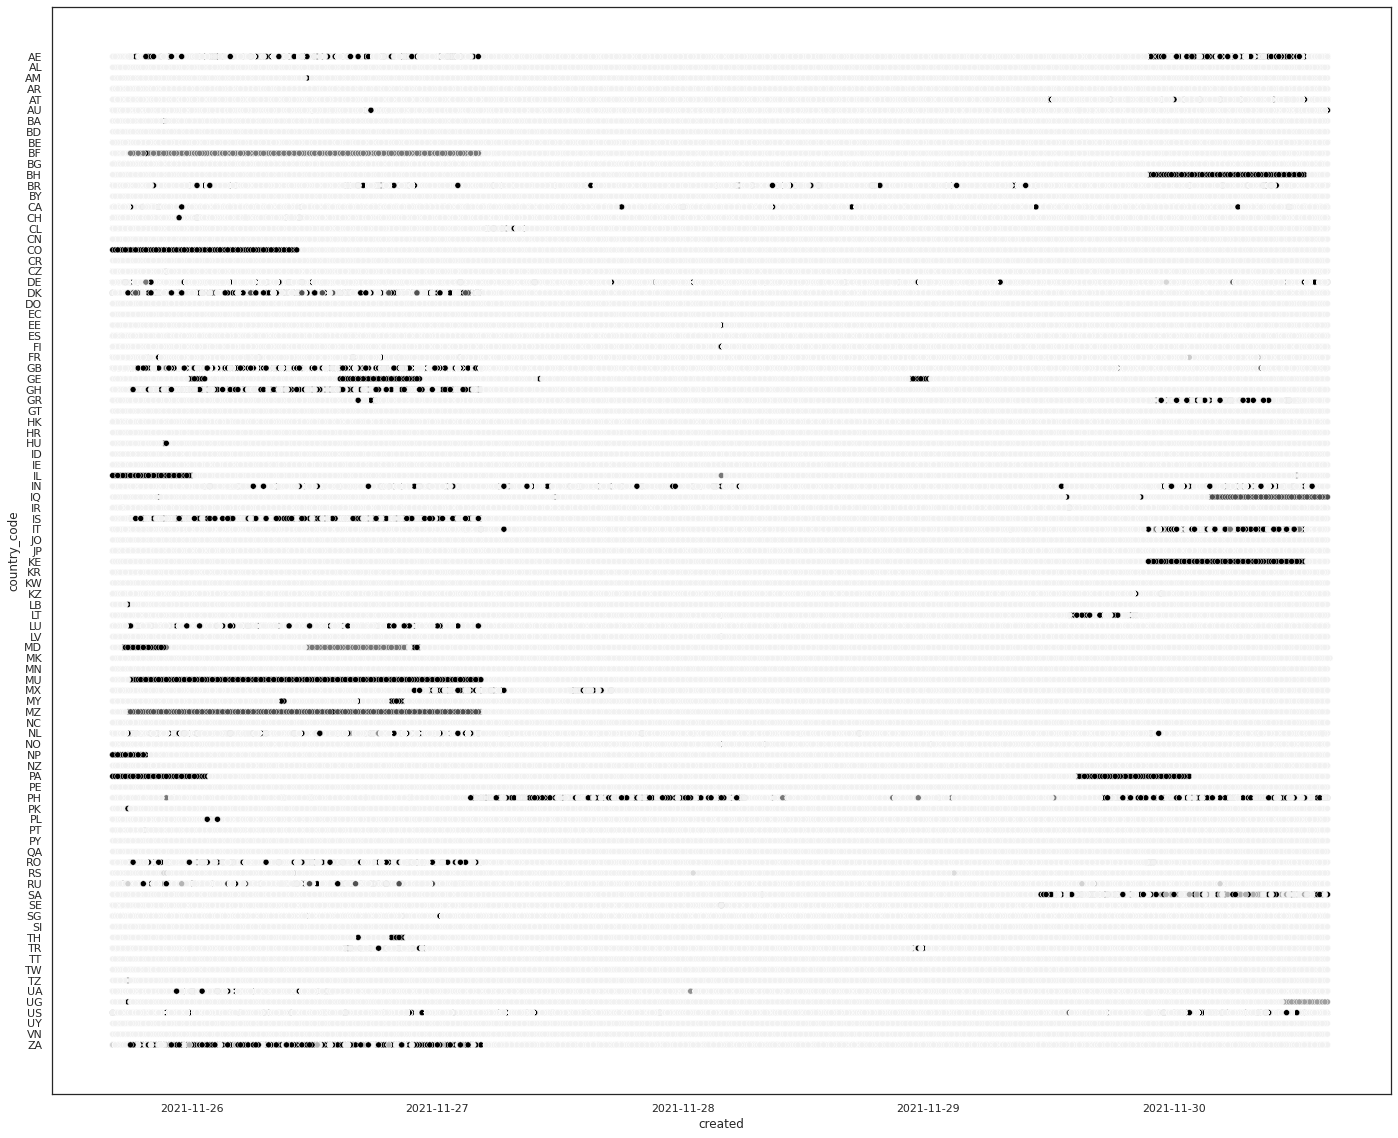

In [27]:
sns.set(rc={"figure.figsize":(24, 20)})
sns.set_style("white")
sns.scatterplot(data=sorted_df, x="created", y="country_code", hue="normalized_score",legend=False, palette="light:black")



<AxesSubplot:xlabel='created', ylabel='probe_id'>

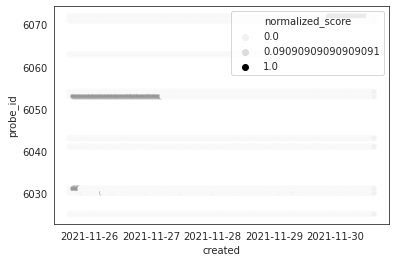

In [9]:

sns.scatterplot(data=selected_df, x="created", y="probe_id", hue="normalized_score", palette="light:black")

In [119]:
def get_asns(unique_probe_ids):
    asns= []
    for probe_id in unique_probe_ids:
        response = requests.get(f"https://atlas.ripe.net/api/v2/probes/{probe_id}").json()
        asns.append(response['asn_v4'])
    return asns
    

In [120]:
print(get_asns(unique_probes))

[8839, 13004, 1101, 25509, 513, 10474, 28000, 50168, 2611, 7922, 33988, 21282, 43996, 8781, 14907, 16004, 14907, 8676, 53824, 29632, 198068, 1133, 7590, 43996, 28753, 56055, 37474, 33920, 3274, 2128, 24725, 12676, 34587, 26167, 327844, 9158, 135150, 9158, 42961, 12859, 12731, 21412, 25291, 6667, 2602, 8560, 719, 5377, 39405, 3257, 199993, 15133, 49784, 34288, 206549, 35003, 5379, 1307, 25192, 15133, 39029, 15133, 42409, 8522, 15133, 37577, 1764, 38001, 61138, 12779, 198985, 50170, 206186, 25406, 48943, 62416, 42473, 6724, 20766, 2857, 42473, 42473, 62113, 10745, 203993, 2914, 199159, 680, 39351, 13041, 37386, 39878, 265721, 8670, 15133, 39138, 59105, 680, 36236, 30997, 58431, 5607, 52039, 4764, 21473, 17054, 52336, 42473, 264811, 5539, 22894, 31287, None, 202196, 55002, 34549, 48276, 48112, 17054, 42473, 41000, 50178, 2497, 59795, 9268, 48292, 41405, 50999, 206479, 20473, 20473, 60396, 15133, 35065, 48854, 35574, 55002, 20473, 20473, 16509, 16509, 16509, 16509, 16509, 16509, 16509, 550